## Accessing USDA Food Data Central API for Nutritional Information

This script interacts with the USDA Food Data Central API to search for food items and retrieve nutritional information.

In [218]:
#!pip install requests
import requests

# Define your API key (it should be the actual key, not "OAS3.0:")
api_key = 'M3175TAXsEcfdKkCOpNO9VcbwjQtFOkl9rUDAiaP'

# Function to search for a food item and get its FDC ID
def search_food(query):
    #This is the data set for the USDA government
    url = "https://api.nal.usda.gov/fdc/v1/foods/search"
    # my parameters are query for the 
    params = {
        "query": query, # search term enterd by user 
        "api_key": api_key, 
        "pageSize": 1  # Return only the top result
    }
    # using request.get() to send a get request to the API endpoint
    response = requests.get(url, params=params)
    #lines checks for the Https status and if it 200 then its okay
    if response.status_code == 200:
        # returns the json format to dictionary
        data = response.json()
        #checks for food items 
        if data['foods']:
            # this will get the first result 
            food_item = data['foods'][0]
            # return the food id and its description
            return food_item['fdcId'], food_item['description']
        else:
           #No foods were found
            print("No foods found.")
            return None, None
    else:
      # it will print out the error responce code
        print(f"Error: {response.status_code}")
        return None, None

# Function to retrieve detailed nutritional information using FDC ID
def get_food_details(fdc_id):

    url = f"https://api.nal.usda.gov/fdc/v1/food/{fdc_id}"
    params = {
        "api_key": api_key,
        "format": "full"#All available details for food
    }
    # Returns the full detail information for the food 
    response = requests.get(url, params=params)
    # Same thing as earlier 
    if response.status_code == 200:
        food_details = response.json()
        return food_details
    else:
        print(f"Error: {response.status_code}")
        return None

# whatever the user wants

foodname = str(input("Please enter the name of the object you want the nutrition data for: "))

# Example usage
if __name__ == "__main__":
    food_query = foodname
    fdc_id, description = search_food(food_query)
    
    if fdc_id:
        print(f"FDC ID: {fdc_id}, Description: {description}")
        food_details = get_food_details(fdc_id)
        
        # Print out some of the nutritional information
        if food_details:
            print(f"\nNutritional Information for {description}:")
            for nutrient in food_details.get('foodNutrients', []):
                print(f"{nutrient['nutrient']['name']}: {nutrient['amount']} {nutrient['nutrient']['unitName']}")
    else:
        print("Could not retrieve food details.")

FDC ID: 2012128, Description: BANANA

Nutritional Information for BANANA:
Fatty acids, total trans: 0.0 g
Calcium, Ca: 125.0 mg
Protein: 12.5 g
Total Sugars: 6.25 g
Vitamin C, total ascorbic acid: 15.0 mg
Energy: 312.0 kcal
Iron, Fe: 1.12 mg
Vitamin A, IU: 0.0 IU
Fatty acids, total saturated: 0.0 g
Cholesterol: 0.0 mg
Fatty acids, total polyunsaturated: 3.12 g
Carbohydrate, by difference: 40.62 g
Fiber, total dietary: 6.2 g
Sodium, Na: 594.0 mg
Total lipid (fat): 6.25 g
Fatty acids, total monounsaturated: 3.12 g


## Extract Video Frames in Smaller Batches

1. Process multiple videos from the input folder.
2. Create a new numbered subfolder within the output folder for each video.
3. Name each subfolder with a sequential number followed by _vid.
4. Store the extracted frames as JPG files within their respective subfolders.

In [220]:
import cv2
import os

def video_to_frames_in_smaller_batches(video_folder, output_folder, desired_fps):
    print(f"Processing videos in {video_folder} to {output_folder} with {desired_fps} FPS")
    # List all video files in the selected folder
    video_files = [f for f in os.listdir(video_folder) if os.path.isfile(os.path.join(video_folder, f)) and f.endswith(('.mp4', '.avi', '.mov', '.MOV','.mkv'))]

    if not video_files:
        print("No video files found in the selected folder.")
        return

    for idx, video_file in enumerate(video_files, start=1):
        video_path = os.path.join(video_folder, video_file)

        # Create a new subfolder in the output folder named <number>_vid
        video_output_folder = os.path.join(output_folder, f'{idx}_vid')
        os.makedirs(video_output_folder, exist_ok=True)

        # Open the video file
        cap = cv2.VideoCapture(video_path)
        original_fps = cap.get(cv2.CAP_PROP_FPS)

        if original_fps <= 0:
            print(f"Warning: Unable to retrieve FPS for video {video_file}. Skipping...")
            continue

        # Calculate the frame interval to match the desired FPS
        frame_interval = int(round(original_fps / desired_fps))

        if frame_interval <= 0:
            frame_interval = 1  # Ensure at least every frame is processed

        frame_count = 0
        saved_frame_count = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Save frames at the specified interval into the specific subfolder
            if frame_count % frame_interval == 0:
                frame_filename = os.path.join(video_output_folder, f'frame_{saved_frame_count:05d}.jpg')
                cv2.imwrite(frame_filename, frame)
                saved_frame_count += 1

            frame_count += 1

        cap.release()
        print(f"Extracted frames from '{video_file}' into the folder '{video_output_folder}'.")

    print("Processing complete.")

## Video file selection

This code cell creates a graphical user interface (GUI) using Python's `tkinter` library to assist users in processing video files. The GUI guides the user through the following steps:

1. **Greeting the User**: Asks if they would like to process videos.
2. **Selecting a Video Folder**: Opens a dialog for the user to choose a folder containing video files.
3. **Handling Missing Files**: Provides help if the user cannot find the desired video folder.
4. **Prompting for Frames Per Second (FPS)**: Asks the user to input the desired frames per second (FPS) for the video processing.
5. **Selecting an Output Folder**: Prompts the user to choose or create a folder where the processed frames will be saved.
6. **Handling Default Output Folder**: If the user does not select an output folder, the program creates a default folder named `output_file` in the current working directory.
7. **Handling Duplicate Output Folders**: If a folder named `output_file` already exists, the program notifies the user and terminates to avoid conflicts.
8. **Processing the Videos**: Processes the videos by extracting frames at the specified FPS and saves them in the output folder.



In [221]:
import tkinter as tk
from tkinter import filedialog, messagebox, simpledialog


# Function to handle when the user can't find their file (to be implemented)
def handle_cant_find_file():
    # Placeholder for the file search assistance logic
    messagebox.showinfo("Help", "Please check your folder structure and try again.")



def greet_and_prompt():
    root = tk.Tk()
    root.withdraw()  # Hide the root window

    # Greet the user
    user_response = messagebox.askquestion("Welcome", "Hello! Would you like to process videos?")

    if user_response == 'yes':
        while True:
            # Ask the user to select the folder containing video files
            video_folder = filedialog.askdirectory(title="Select the Folder Containing Videos")

            if video_folder:
                break  # Break the loop if a folder is selected
            else:
                # Option for the user if they can't find the folder
                cant_find_response = messagebox.askquestion("Can't Find Folder",
                                                            "Can't find your folder? Would you like some help?",
                                                            icon='warning')
                if cant_find_response == 'yes':
                    handle_cant_find_file()
                else:
                    messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
                    root.update()  # Process any pending events
                    root.quit()  # Exit the main loop
                    root.destroy()  # Destroy the Tkinter root window
                    return  # Exit the function and stop the script

        # Prompt the user to select the output folder
        select_output_response = messagebox.askquestion("Output Folder", "Would you like to select an output folder now?")
        
        if select_output_response == 'yes':
            while True:
                output_folder = filedialog.askdirectory(title="Select Output Folder")

                if output_folder:
                    messagebox.showinfo("Folder Selected", f"Output folder selected: {output_folder}")
                    break  # Proceed if a valid output folder is selected
                else:
                    # Notify the user to select a folder or quit the process
                    retry_response = messagebox.askquestion("No Folder Selected",
                                                            "You haven't selected an output folder. Would you like to try again?",
                                                            icon='warning')
                    if retry_response == 'no':
                        messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
                        root.update()  # Process any pending events
                        root.quit()  # Exit the main loop
                        root.destroy()  # Destroy the Tkinter root window
                        return  # Exit the function and stop the script
        else:
            messagebox.showinfo("Goodbye", "You chose not to select an output folder. Goodbye!")
            root.update()  # Process any pending events
            root.quit()  # Exit the main loop
            root.destroy()  # Destroy the Tkinter root window
            return  # Exit the function and stop the script

        # Ask the user to input the frames per second (FPS)
        fps = simpledialog.askinteger("Frames Per Second", "Please enter the frames per second (FPS) value:", minvalue=1)

        if fps:
            # Call the function with the gathered information
            video_to_frames_in_smaller_batches(video_folder, output_folder, int(fps))
            messagebox.showinfo("Process Complete", f"Videos processed with {fps} frames per second.")
        else:
            messagebox.showinfo("No FPS Entered", "You didn't enter a valid FPS value. Goodbye!")
    
    else:
        messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
    
    root.update()  # Process any pending events
    root.quit()  # Exit the main loop
    root.destroy()  # Destroy the Tkinter root window


# Call the function
if __name__ == "__main__":
    greet_and_prompt()


Processing videos in /Users/jeanmarckceant/Desktop/dataset/Onions to /Users/jeanmarckceant/Desktop/dataset/1_Output with 3 FPS
Extracted frames from 'IMG_1115.mov' into the folder '/Users/jeanmarckceant/Desktop/dataset/1_Output/1_vid'.
Extracted frames from 'IMG_1116.mov' into the folder '/Users/jeanmarckceant/Desktop/dataset/1_Output/2_vid'.
Extracted frames from 'IMG_1113.mov' into the folder '/Users/jeanmarckceant/Desktop/dataset/1_Output/3_vid'.
Extracted frames from 'IMG_1112.mov' into the folder '/Users/jeanmarckceant/Desktop/dataset/1_Output/4_vid'.
Extracted frames from 'IMG_1118.mov' into the folder '/Users/jeanmarckceant/Desktop/dataset/1_Output/5_vid'.
Processing complete.


## Video segmentation with SAM 2
This notebook shows how to use SAM 2 for interactive segmentation in videos. It will cover the following:

- adding clicks (or box) on a frame to get and refine _masklets_ (spatio-temporal masks)
- propagating clicks (or box) to get _masklets_ throughout the video
- segmenting and tracking multiple objects at the same time

We use the terms _segment_ or _mask_ to refer to the model prediction for an object on a single frame, and _masklet_ to refer to the spatio-temporal masks across the entire video. 

## Annotating Images with Bounding Boxes for Object Detection

This script helps annotate objects in images by drawing bounding boxes and saving them as training labels for models.
If running locally using jupyter, first install `segment-anything-2` in your environment using the [installation instructions](https://github.com/facebookresearch/segment-anything-2#installation) in the repository.


## Set env for SAM2 

In [222]:
using_colab = False
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything-2.git'

    !mkdir -p videos
    !wget -P videos https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
    !unzip -d videos videos/bedroom.zip

    !mkdir -p ../checkpoints/
    !wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt

    

In [223]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [225]:
# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )

using device: mps

Support for MPS devices is preliminary. SAM 2 is trained with CUDA and might give numerically different outputs and sometimes degraded performance on MPS. See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion.


## Loading SAM2 Video Predictor

In [226]:
from sam2.build_sam import build_sam2_video_predictor

sam2_checkpoint = "../checkpoints/sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"

predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device)

In [227]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

## Select an example video

IT is assumend that the video is stored as a list of j peg frames

In [228]:
import tkinter as tk
from tkinter import filedialog, messagebox

# Global variable to store the selected directory
selected_directory = None

# Function to pick a video directory
def pick_directory():
    global selected_directory
    selected_directory = filedialog.askdirectory(title="Select Video Directory")
    if selected_directory:
        label_var.set(f"Stored Directory: {selected_directory}")
    else:
        label_var.set("No directory/folder stored")

# Function to greet the user and provide instructions
def greet_user():
    messagebox.showinfo("Greeting", "Hello! Please select the video directory to store.")

# Function to perform some action with the selected directory
def use_selected_directory():
    if selected_directory:
        print(f"Using directory: {selected_directory}")
        # Here you can add the logic to use the selected directory
    else:
        print("No directory selected to use.")

if __name__ == "__main__":
    # Initialize the Tkinter window
    root = tk.Tk()
    root.title("Video Directory Picker")

    # Greeting the user
    greet_user()

    # Label to display the stored directory or status
    label_var = tk.StringVar()
    label_var.set("No directory/folder stored")

    label = tk.Label(root, textvariable=label_var, font=("Arial", 12))
    label.pack(pady=20)

    # Button to open the directory picker
    button = tk.Button(root, text="Pick Video Directory", command=pick_directory, font=("Arial", 12))
    button.pack(pady=20)

    # Button to use the selected directory in some way
    use_button = tk.Button(root, text="Use Selected Directory", command=use_selected_directory, font=("Arial", 12))
    use_button.pack(pady=20)

    # Run the Tkinter event loop
    root.mainloop()

    # After the Tkinter loop ends, you can still access the selected_directory
    if selected_directory:
        print(f"Final selected directory: {selected_directory}")
    else:
        print("No directory was selected.")


Using directory: /Users/jeanmarckceant/Desktop/dataset/1_Output/2_vid
Using directory: /Users/jeanmarckceant/Desktop/dataset/1_Output/2_vid
Final selected directory: /Users/jeanmarckceant/Desktop/dataset/1_Output/2_vid


## Renamed the file so it can be ordered 

In [229]:
import os
from PIL import Image

video_dir = selected_directory

# Scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1].lower() in [".jpg", ".jpeg"]
]

# Rename files by removing the 'frame_' prefix
for frame_name in frame_names:
    new_name = frame_name.replace('frame_', '')
    os.rename(os.path.join(video_dir, frame_name), os.path.join(video_dir, new_name))

print("Renaming completed. Files should now be in the correct format.")

Renaming completed. Files should now be in the correct format.


## Initialize the inference state
Preparing SAM2 for performing task like video segmentation

In [230]:
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 109/109 [00:02<00:00, 43.55it/s]


### Example 1: Segment & track one object

Note: if you have run any previous tracking using this `inference_state`, please reset it first via `reset_state`.

(The cell below is just for illustration; it's not needed to call `reset_state` here as this `inference_state` is just freshly initialized above.)

In [231]:
predictor.reset_state(inference_state)

#### Step 1: Add a first click on a frame

In [232]:
print(selected_directory)

/Users/jeanmarckceant/Desktop/dataset/1_Output/2_vid


## This function is for the object detection 

you should click on the object you want to tap once done check the output and it should give you an output the object it detected, once done please press the red x button on the top. 

In [234]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        
        # Convert obj_id to a valid colormap index if it's not an integer
        if isinstance(obj_id, str):
            cmap_idx = hash(obj_id) % cmap.N  # Use hash and modulo to keep it in the colormap range
        elif isinstance(obj_id, int):
            cmap_idx = obj_id % cmap.N  # Ensure it's within the colormap range
        else:
            cmap_idx = 0  # Default to 0 if obj_id is None or invalid

        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


Clicked coordinates: [(366.6965085049239, 797.5649059982095)]


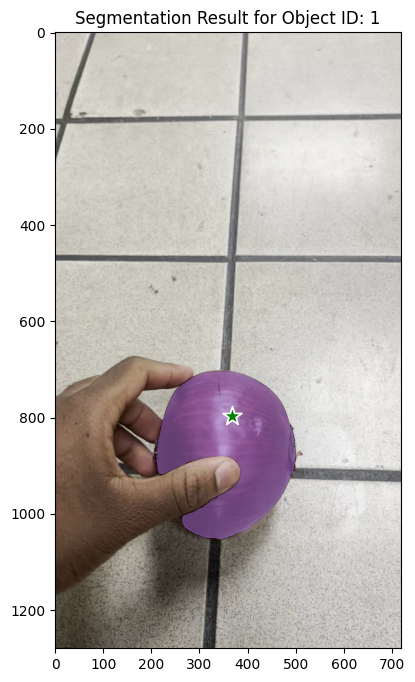

In [235]:
import tkinter as tk
from PIL import Image, ImageTk
import os
import numpy as np
import matplotlib.pyplot as plt


# Adjust for DPI settings (useful for high-resolution displays)



# Initialize the global coordinates variable
coordinates = []
original_size = None  # To store the original size of the image
object_name = ''
frame_path = ''

def access_first_frame(video_dir):
    global frame_path
    # List all JPG files and sort them (if sorting is needed)
    files = sorted([f for f in os.listdir(video_dir) if f.endswith('.jpg')])
    if not files:
        print("No JPG files found in the directory.")
        return None

    # Ensure that we are accessing the first frame named '00000.jpg'
    first_frame_path = os.path.join(video_dir, '00000.jpg')

    if not os.path.exists(first_frame_path):
        print(f"'00000.jpg' not found in the directory. Accessing the first available file instead.")
        first_frame_path = os.path.join(video_dir, files[0])  # Fallback to the first file

    frame_path = first_frame_path
    return first_frame_path


def show_all_elements(ax, img_path, masks=None, points=None, labels=None, boxes=None, obj_id=None, random_color=False):
    """
    Displays all elements (image, masks, points, boxes) on the same axis.

    :param ax: The axis to plot on.
    :param img_path: The path to the original image.
    :param masks: A list of masks to display.
    :param points: A numpy array of points to display.
    :param labels: The labels corresponding to the points.
    :param boxes: A list of boxes to display.
    :param obj_id: Optional object ID for color consistency.
    :param random_color: Whether to use random colors for masks.
    """
    # Load and display the original image
    img = Image.open(img_path)
    ax.imshow(img)

    # Display masks
    if masks is not None:
        for mask in masks:
            show_mask(mask, ax, obj_id=obj_id, random_color=random_color)

    # Display points
    if points is not None and labels is not None:
        show_points(points, labels, ax)

    # Display boxes
    if boxes is not None:
        for box in boxes:
            show_box(box, ax)

    plt.title(f"Segmentation Result for Object ID: {obj_id}")
    plt.show()



# Function to handle single clicks (adding or removing a coordinate)
def on_single_click(event, canvas):
    global coordinates, object_name  # Declare that we are using the global coordinates list
    x, y = event.x, event.y

    # Retrieve the scaling factor from the canvas attributes (if previously set)
    scaling_factor = canvas.scaling_factor if hasattr(canvas, 'scaling_factor') else 1.0

    # Adjust the click coordinates back to the original image scale
    original_x = x / scaling_factor
    original_y = y / scaling_factor
    clicked_coord = (original_x, original_y)

    # Check if the click is near an existing coordinate to remove it
    for coord in coordinates:
        if abs(coord[0] - original_x) <= 5 and abs(coord[1] - original_y) <= 5:
            coordinates.remove(coord)
            print(f"Removed coordinates: {coord}")
            display_image(canvas.video_dir, canvas)  # Redraw the image
            update_segmentation(canvas)  # Update the segmentation after removing a point
            return

    # If the click is not on an existing dot, add the coordinate
    coordinates.append(clicked_coord)
    print(f"Clicked coordinates: {coordinates}")
    # Mark the coordinate on the canvas, scaling back to the canvas size
    scaled_x = int(original_x * scaling_factor)
    scaled_y = int(original_y * scaling_factor)
    canvas.create_oval(scaled_x - 5, scaled_y - 5, scaled_x + 5, scaled_y + 5, outline="red", width=2)

    # Prompt the user for the object name
    object_name = input("Enter the name of the object you clicked on: ")

    # Store the object name with the coordinates
    update_segmentation(canvas, object_name)  # Pass the object name to the segmentation function


def display_image(video_dir, canvas):
    global original_size
    first_frame_path = access_first_frame(video_dir)
    if not first_frame_path:
        return

    img = Image.open(first_frame_path)
    original_size = img.size  # Store the original image size

    # Convert image to a format compatible with tkinter without rescaling
    img_tk = ImageTk.PhotoImage(img)

    # Get the screen size
    root = tk.Tk()
    root.withdraw()
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    root.destroy()

    # Calculate the scaling factor to fit the image on the screen
    scaling_factor = min(screen_width / original_size[0], screen_height / original_size[1])
    canvas.scaling_factor = scaling_factor

    # Calculate the new size while maintaining the aspect ratio
    new_width = int(original_size[0] * scaling_factor)
    new_height = int(original_size[1] * scaling_factor)
    new_size = (new_width, new_height)

    # Resize the image to the new size
    img_resized = img.resize(new_size, Image.LANCZOS)

    # Convert the resized image to a format compatible with tkinter
    img_tk_resized = ImageTk.PhotoImage(img_resized)

    # Set the canvas size to the new image size
    canvas.config(width=new_width, height=new_height)

    # Clear the canvas and place the resized image
    canvas.delete("all")
    canvas.create_image(0, 0, anchor=tk.NW, image=img_tk_resized)

    # Keep a reference to the image to avoid garbage collection
    canvas.image = img_tk_resized

    # Redraw existing coordinates on the image, adjusting for scaling
    for coord in coordinates:
        scaled_x = coord[0] * scaling_factor
        scaled_y = coord[1] * scaling_factor
        canvas.create_oval(scaled_x-5, scaled_y-5, scaled_x+5, scaled_y+5, outline="red", width=2)



# Global dictionary to store segmentation results
segmentation_results = {}
## Use function that c
def update_segmentation(canvas, object_name):
    global segmentation_results

    # Convert the coordinates to numpy array for the model
    points = np.array([[coord[0], coord[1]] for coord in coordinates], dtype=np.float32)

    # If no points are selected, clear the segmentation
    if len(points) == 0:
        plt.figure(figsize=(9, 6))
        plt.imshow(Image.open(access_first_frame(canvas.video_dir)))  # Load and display the frame
        plt.title("Segmentation Result")
        plt.show()
        return

    # Create labels array: 1 for positive click
    labels = np.ones(len(coordinates), dtype=np.int32)

    # Get the frame path (already in JPG format) from the canvas object
    frame_path = access_first_frame(canvas.video_dir)

    # Reset the inference state to clear previous predictions
    predictor.reset_state(inference_state)

    # Generate a unique object ID
    obj_id = object_name

    # Get the segmentation mask using the frame path
    mask, frame_path = segment_object(frame_path, points, labels, obj_id=obj_id)

    # Ensure the mask is 2D by squeezing any extra dimensions
    mask = np.squeeze(mask)  # This removes any dimensions of size 1, e.g., from (1, 540, 960) to (540, 960)

    # Store the segmentation result in the global dictionary
    # Use the function that was guven to convert the mask in the yolo format and save that in the text file 
    frame_idx = extract_frame_index(frame_path)
    segmentation_results[frame_idx] = {obj_id: mask}

    # Display the mask, points, and boxes together on the original image using the combined function
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    show_all_elements(ax, img_path=frame_path, masks=[mask], points=points, labels=labels, boxes=None, obj_id=obj_id)





def segment_object(frame_path, points, labels, obj_id=None):
    """
    Uses the segmentation model to generate a mask for the object based on the clicked points.

    :param frame_path: str, path to the frame in JPG format.
    :param points: np.ndarray, array of points where the user clicked.
    :param labels: np.ndarray, array of labels corresponding to the points.
    :param obj_id: int, optional, unique ID for the object you are interacting with.
    :return: np.ndarray, a binary mask of the segmented object.
    """

    ann_frame_idx = extract_frame_index(frame_path)  # Custom function to extract frame index from frame path

    ann_obj_id = obj_id if obj_id is not None else generate_unique_obj_id(points)  # Custom function to generate unique obj_id

    # Load the frame from the path
    frame_image = Image.open(frame_path)
    frame_np = np.array(frame_image)  # Convert the PIL image to a numpy array

    # Ensure points are in the correct format (e.g., [[x1, y1], [x2, y2], ...])
    if isinstance(points, list):
        points = np.array(points)

    # Ensure labels are correctly formatted (e.g., [1, 1, ...] or other appropriate labels)
    labels = np.array(labels)

    # Call the model's function to generate the mask
    _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
        inference_state=inference_state,
        frame_idx=ann_frame_idx,
        obj_id=ann_obj_id,
        points=points,
        labels=labels,
    )

    # Ensure the output logits are processed correctly into a mask
    mask = (out_mask_logits[0] > 0.0).cpu().numpy()

    # Verify that the mask correctly covers the object
    if not np.any(mask):
        print("Warning: No mask generated. Check if points and labels are correctly set.")

    # Return the mask and the frame path for visualization
    return mask, frame_path


def extract_frame_index(frame_path):
    # Assuming the frame index is the last part of the path before the file extension
    # For example, if frame_path is 'folder/bedroom/00132.jpg'

    # Extract the base name (e.g., '00132.jpg')
    base_name = os.path.basename(frame_path)

    # Remove the file extension and convert to an integer (e.g., '00132' -> 132)
    frame_index = int(os.path.splitext(base_name)[0])

    return frame_index


def generate_unique_obj_id(points):
    # Generate a unique obj_id based on the points clicked within this frame
    # This is a placeholder and should be replaced with actual logic
    return hash(tuple(points.flatten()))  # Example logic using the hash of the points

# Main function to set up the GUI
def main():
    root = tk.Tk()
    root.title("Image Clicker")

    # Use the pre-defined directory containing JPG files
    video_dir = selected_directory
    if not video_dir:
        print("No directory selected.")
        return

    canvas = tk.Canvas(root, width=800, height=600)
    canvas.pack()

    # Store the directory path in the canvas object
    canvas.video_dir = video_dir

    # Bind single-click (Button-1) to add or remove a coordinate
    canvas.bind("<Button-1>", lambda event: on_single_click(event, canvas))

    display_image(video_dir, canvas)

    root.mainloop()

# Run the main function
main()


### Acessing the results

In [236]:
# Example of accessing the segmentation results for a specific object
frame_idx = extract_frame_index(frame_path)  # Extract the correct frame index
name = object_name  # Replace with the correct object name

print(f"Checking segmentation results for frame {frame_idx} and object '{object_name}'.")

if frame_idx in segmentation_results:
    if object_name in segmentation_results[frame_idx]:
        mask = segmentation_results[frame_idx][object_name]
        # Now you can use the mask for further processing or visualization
        print("Mask found and can be used now.")
    else:
        print(f"Object '{object_name}' not found in frame {frame_idx}.")
else:
    print(f"Frame {frame_idx} not found in segmentation results.")



Checking segmentation results for frame 0 and object '1'.
Mask found and can be used now.


## Sorting the frames 

In [237]:
import os

# Function to sort the frame names
def get_sorted_frame_names(directory):
    # List all JPG files
    files = [f for f in os.listdir(directory) if f.endswith('.jpg')]
    
    # Sort files based on the numeric part of the filename
    files.sort(key=lambda f: int(os.path.splitext(f)[0]))
    
    return files

# Usage
frame_names = get_sorted_frame_names(selected_directory)

# Print the sorted frame names
print(frame_names)

['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg'

In [238]:
print(f"Segmentation results for frame {frame_idx}: {segmentation_results[frame_idx]}")

Segmentation results for frame 0: {'1': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}


In [239]:
if np.any(segmentation_results[frame_idx][object_name]):
    print("There are True values in the mask.")
else:
    print("The mask is entirely False.")


There are True values in the mask.


In [241]:
true_indices = np.argwhere(segmentation_results[frame_idx][object_name])
print(f"True values found at indices: {true_indices}")


True values found at indices: [[ 705  337]
 [ 705  338]
 [ 705  339]
 ...
 [1053  346]
 [1053  347]
 [1053  348]]


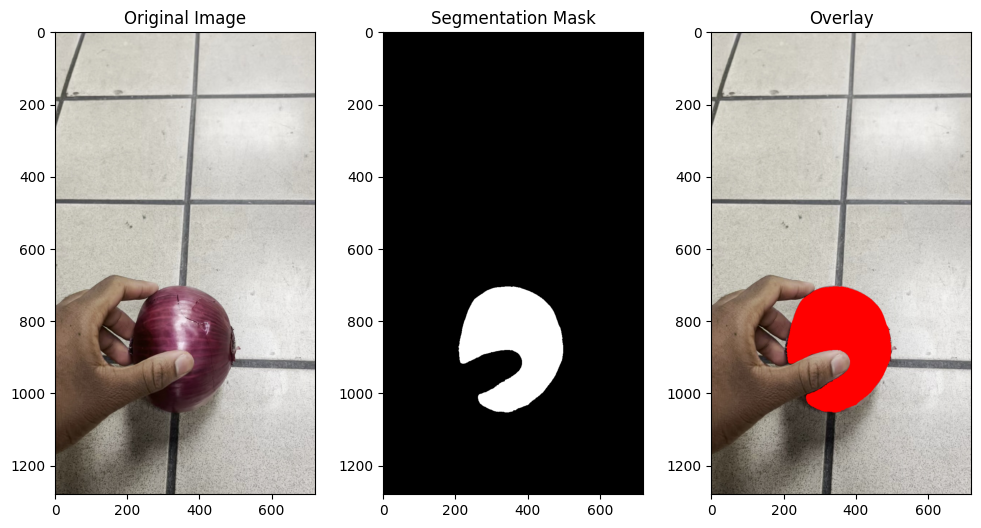

In [242]:
import matplotlib.pyplot as plt

# Assuming you want to overlay the mask on the original image
original_image = np.array(Image.open(frame_path))
mask = segmentation_results[frame_idx][object_name]

# Create an overlay by combining the original image and the mask
overlay = np.zeros_like(original_image)
overlay[mask] = [255, 0, 0]  # Color the mask area red

combined_image = np.where(mask[..., None], overlay, original_image)

# Plot the original image, the mask, and the combined overlay
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image)

plt.subplot(1, 3, 2)
plt.title("Segmentation Mask")
plt.imshow(mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(combined_image)

plt.show()


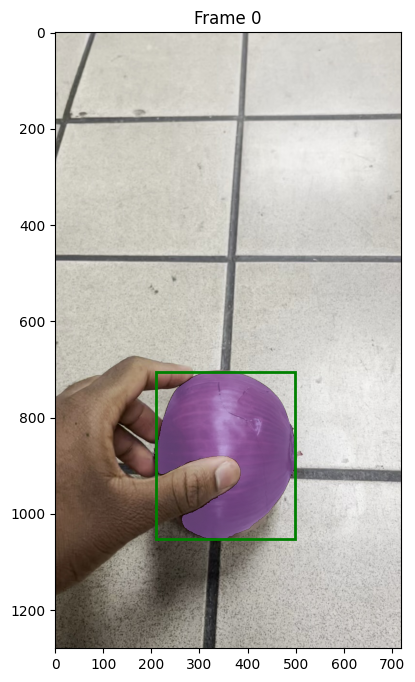

In [243]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def get_bounding_box_from_mask(mask):
    # Ensure the mask is 2D by squeezing out any singleton dimensions
    mask = np.squeeze(mask)

    # Get the coordinates where the mask is True
    coords = np.argwhere(mask)

    if coords.size == 0:
        return None  # Return None if no mask is found

    # Get the top-left and bottom-right coordinates of the bounding box
    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0)

    # Return the bounding box in the format (x0, y0, x1, y1)
    return [x0, y0, x1, y1]

# Assume the frame index we are interested in is 0 (first frame)
frame_idx = 0

# Load the first frame image
first_frame_path = os.path.join(selected_directory, frame_names[frame_idx])
first_frame_image = Image.open(first_frame_path)

# Create a new figure for displaying the results
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(first_frame_image)

# Extract masks and draw bounding boxes from segmentation results
if frame_idx in segmentation_results:
    for obj_id, mask in segmentation_results[frame_idx].items():
        # Calculate the bounding box from the mask
        box = get_bounding_box_from_mask(mask)
        
        if box is not None:
            # Draw the mask and box
            show_mask(mask, ax, obj_id=obj_id)
            show_box(box, ax)

plt.title(f"Frame {frame_idx}")
plt.show()


## where user will select the directory for the segment object to be stored 

In [244]:
import tkinter as tk
from tkinter import filedialog, messagebox

# Global variable to store the propagated videos directory
propagated_videos_directory = None

# Function to pick a video directory
def pick_directory():
    global propagated_videos_directory
    propagated_videos_directory = filedialog.askdirectory(title="Select Video Directory")
    if propagated_videos_directory:
        label_var.set(f"Stored Directory: {propagated_videos_directory}")
    else:
        label_var.set("No directory/folder stored")

# Function to greet the user and provide instructions
def greet_user():
    messagebox.showinfo("Greeting", "Hello! Please select the video directory to store.")

# Function to perform some action with the selected directory
def use_selected_directory():
    if propagated_videos_directory:
        print(f"Using directory: {propagated_videos_directory}")
        # Here you can add the logic to use the selected directory
    else:
        print("No directory selected to use.")

if __name__ == "__main__":
    # Initialize the Tkinter window
    root = tk.Tk()
    root.title("Video Directory Picker")

    # Greeting the user
    greet_user()

    # Label to display the stored directory or status
    label_var = tk.StringVar()
    label_var.set("No directory/folder stored")

    label = tk.Label(root, textvariable=label_var, font=("Arial", 12))
    label.pack(pady=20)

    # Button to open the directory picker
    button = tk.Button(root, text="Pick Video Directory", command=pick_directory, font=("Arial", 12))
    button.pack(pady=20)

    # Button to use the selected directory in some way
    use_button = tk.Button(root, text="Use Selected Directory", command=use_selected_directory, font=("Arial", 12))
    use_button.pack(pady=20)

    # Run the Tkinter event loop
    root.mainloop()

    # After the Tkinter loop ends, you can still access the propagated_videos_directory
    if propagated_videos_directory:
        print(f"Final selected directory: {propagated_videos_directory}")
    else:
        print("No directory was selected.")


Using directory: /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/1_images_onions
Using directory: /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/1_images_onions
Final selected directory: /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/1_images_onions


In [245]:
print(frame_names)  # Print the list to see the paths


['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg'

In [246]:
print(propagated_videos_directory)  # Ensure this is the correct directory


/Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/1_images_onions


### Okay this is for the object propogation i was able to popogate the object

propagate in video: 100%|██████████| 109/109 [02:57<00:00,  1.63s/it]


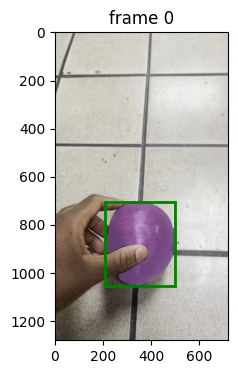

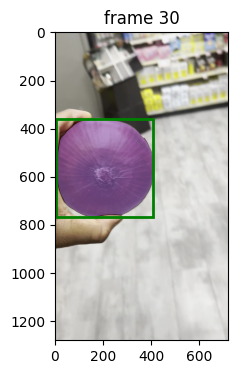

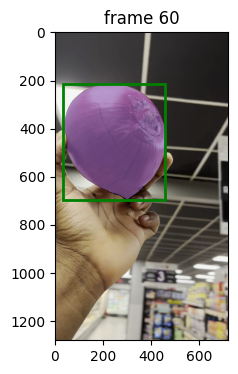

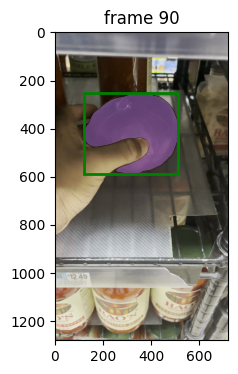

In [247]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def get_bounding_box_from_mask(mask):
    # Ensure the mask is 2D by squeezing out any singleton dimensions
    mask = np.squeeze(mask)

    # Get the coordinates where the mask is True
    coords = np.argwhere(mask)

    if coords.size == 0:
        return None  # Return None if no mask is found

    # Get the top-left and bottom-right coordinates of the bounding box
    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0)

    # Return the bounding box in the format (x0, y0, x1, y1)
    return [x0, y0, x1, y1]

# Run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

# Combine with initial segmentation results
for frame_idx, mask_dict in segmentation_results.items():
    if frame_idx not in video_segments:
        video_segments[frame_idx] = {}
    for obj_id, mask in mask_dict.items():
        video_segments[frame_idx][obj_id] = mask  # Store the mask directly

# Render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")
for out_frame_idx in range(0, len(frame_names), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(selected_directory, frame_names[out_frame_idx])))
    
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        if isinstance(out_mask, dict):
            for sub_obj_id, sub_mask in out_mask.items():
                show_mask(sub_mask, plt.gca(), obj_id=sub_obj_id)
                # Calculate and show the bounding box
                box = get_bounding_box_from_mask(sub_mask)
                if box is not None:
                    show_box(box, plt.gca())
        else:
            show_mask(out_mask, plt.gca(), obj_id=out_obj_id)
            # Calculate and show the bounding box
            box = get_bounding_box_from_mask(out_mask)
            if box is not None:
                show_box(box, plt.gca())

    plt.show()


### This code specifically allows you to store it in the folder 

In [248]:
print(propagated_videos_directory)

/Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/1_images_onions


# This code will do the bounding boxes and store it in user specific directory

In [249]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def get_bounding_box_from_mask(mask):
    # Ensure the mask is 2D by squeezing out any singleton dimensions
    mask = np.squeeze(mask)

    # Get the coordinates where the mask is True
    coords = np.argwhere(mask)

    if coords.size == 0:
        return None  # Return None if no mask is found

    # Get the top-left and bottom-right coordinates of the bounding box
    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0)

    # Return the bounding box in the format (x0, y0, x1, y1)
    return [x0, y0, x1, y1]

# Run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

# Combine with initial segmentation results
for frame_idx, mask_dict in segmentation_results.items():
    if frame_idx not in video_segments:
        video_segments[frame_idx] = {}
    for obj_id, mask in mask_dict.items():
        video_segments[frame_idx][obj_id] = mask  # Store the mask directly

# Create a directory to save the propagated images with bounding boxes
output_dir = propagated_videos_directory
os.makedirs(output_dir, exist_ok=True)

# Render the segmentation results for every frame and save them
plt.close("all")
for out_frame_idx in range(len(frame_names)):  # Process every frame
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(selected_directory, frame_names[out_frame_idx])))
    
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        if isinstance(out_mask, dict):
            for sub_obj_id, sub_mask in out_mask.items():
                show_mask(sub_mask, plt.gca(), obj_id=sub_obj_id)
                # Calculate and show the bounding box
                box = get_bounding_box_from_mask(sub_mask)
                if box is not None:
                    show_box(box, plt.gca())
        else:
            show_mask(out_mask, plt.gca(), obj_id=out_obj_id)
            # Calculate and show the bounding box
            box = get_bounding_box_from_mask(out_mask)
            if box is not None:
                show_box(box, plt.gca())
    
    # Save the figure to the specified output directory
    output_file_path = os.path.join(output_dir, f"frame_{out_frame_idx:04d}.png")
    plt.savefig(output_file_path)
    plt.close()  # Close the figure to free up memory


propagate in video: 100%|██████████| 109/109 [03:07<00:00,  1.72s/it]


In [ ]:

def find_bbox(mask):
	# Find bounding box coordinates from a mask
	rows = np.any(mask, axis=1)
	cols = np.any(mask, axis=0)
	y, ymax = np.where(rows)[0][[0, -1]]
	x, xmax = np.where(cols)[0][[0, -1]]
    
	box_width = xmax - x
	box_height = ymax - y
	# Transform to YOLO format
	x_center = x + box_width / 2.0
	y_center = y + box_height / 2.0
    
	return [x_center, y_center, box_width, box_height]



def convert_mask_to_yolo(mask, img_width, img_height):
	# Convert mask to YOLO annotation format for object detection
	annotation = ""
    
	# Get unique object IDs in the mask (excluding background)
	objects = np.unique(mask)
	objects = objects[objects != 0]  # Exclude background ID (0)
    
	# Create a mapping from object IDs to class IDs (starting from 0)
	id_mapping = {obj_id: idx for idx, obj_id in enumerate(objects)}
	for obj_id in objects:
    		# Create a mask for the current object
    		obj_mask = (mask == obj_id).astype(np.uint8)
    		bbox = find_bbox(obj_mask)  # Find bounding box for the object
    		# Normalize bbox coordinates to the range [0, 1]
    		bbox[0] /= img_width  # x_min
    		bbox[1] /= img_height  # y_min
    		bbox[2] /= img_width  # x_max
    		bbox[3] /= img_height  # y_max
    		# Use the mapped class_id instead of the original obj_id
    		class_id = id_mapping[obj_id]
    		annotation += f"{class_id} {bbox[0]} {bbox[1]} {bbox[2]} {bbox[3]}\n"	
	return annotation


## This code lets you pick what directory to store your label coordinates in

In [215]:
import tkinter as tk
from tkinter import filedialog, messagebox

# Global variable to store the propagated videos directory
label_directory = None

# Function to pick a video directory
def pick_directory():
    global label_directory
    label_directory = filedialog.askdirectory(title="Select Label Directory")
    if label_directory:
        label_var.set(f"Stored Directory: {label_directory}")
    else:
        label_var.set("No directory/folder stored")

# Function to greet the user and provide instructions
def greet_user():
    messagebox.showinfo("Greeting", "Hello! Please select the Label directory to store.")

# Function to perform some action with the selected directory
def use_selected_directory():
    if label_directory:
        print(f"Using directory: {label_directory}")
        # Here you can add the logic to use the selected directory
    else:
        print("No directory selected to use.")

if __name__ == "__main__":
    # Initialize the Tkinter window
    root = tk.Tk()
    root.title("Video Directory Picker")

    # Greeting the user
    greet_user()

    # Label to display the stored directory or status
    label_var = tk.StringVar()
    label_var.set("No directory/folder stored")

    label = tk.Label(root, textvariable=label_var, font=("Arial", 12))
    label.pack(pady=20)

    # Button to open the directory picker
    button = tk.Button(root, text="Pick Video Directory", command=pick_directory, font=("Arial", 12))
    button.pack(pady=20)

    # Button to use the selected directory in some way
    use_button = tk.Button(root, text="Use Selected Directory", command=use_selected_directory, font=("Arial", 12))
    use_button.pack(pady=20)

    # Run the Tkinter event loop
    root.mainloop()

    # After the Tkinter loop ends, you can still access the propagated_videos_directory
    if label_directory:
        print(f"Final selected directory: {label_directory}")
    else:
        print("No directory was selected.")


No directory selected to use.
Using directory: /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain
Final selected directory: /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain


In [214]:
print(propagated_videos_directory)
print(label_directory)

/Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_images_plaintain
/path/to/your/label_directory


# moving on to YOLO v8

### Preparing the data set by putting the segmented videos coordinates for the bounding boxes in a label folder.


In [206]:
import os
import numpy as np
from PIL import Image

def get_bounding_box_from_mask(mask):
    mask = np.squeeze(mask)
    coords = np.argwhere(mask)

    if coords.size == 0:
        return None

    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0)

    return [x0, y0, x1, y1]

def convert_to_yolo_format(image_width, image_height, box):
    x0, y0, x1, y1 = box
    center_x = (x0 + x1) / 2 / image_width
    center_y = (y0 + y1) / 2 / image_height
    width = (x1 - x0) / image_width
    height = (y1 - y0) / image_height
    return center_x, center_y, width, height

def propagate_and_label(propagated_videos_directory, label_directory, initial_segmentation_results):
    os.makedirs(label_directory, exist_ok=True)
    
    # Assuming the initial segmentation results are for the first frame
    frame_idx = 0
    segmentation_results = initial_segmentation_results

    while True:
        # Generate the current frame path
        frame_name = f"frame_{frame_idx:04d}.png"  # Assuming a naming pattern like 'frame_0000.png'
        frame_path = os.path.join(propagated_videos_directory, frame_name)

        if not os.path.exists(frame_path):
            break  # Exit the loop if the frame does not exist

        # Load the current frame
        image = Image.open(frame_path)
        image_width, image_height = image.size
        
        # Create a label file for the current frame
        label_filename = os.path.join(label_directory, f"{os.path.splitext(frame_name)[0]}.txt")
        with open(label_filename, 'w') as label_file:
            for obj_id, mask in segmentation_results.items():
                box = get_bounding_box_from_mask(mask)
                if box is not None:
                    center_x, center_y, width, height = convert_to_yolo_format(image_width, image_height, box)
                    label_content = f"{obj_id} {center_x} {center_y} {width} {height}\n"
                    label_file.write(label_content)
        
        print(f"Label file created for {frame_name} as {label_filename}")

        # Propagate the segmentation to the next frame
        # Update the segmentation_results variable to hold the segmentation for the next frame
        segmentation_results = propagate_segmentation_to_next_frame(segmentation_results, frame_idx, frame_idx + 1)

        frame_idx += 1

def propagate_segmentation_to_next_frame(segmentation_results, current_frame_idx, next_frame_idx):
    # Implement the logic to propagate the segmentation results to the next frame
    # This is where you would update the segmentation mask for the next frame
    # This function should return the updated segmentation results for the next frame
    return segmentation_results  # Placeholder, replace with actual propagation logic



propagate_and_label(propagated_videos_directory, label_directory, initial_segmentation_results)


# Training a Custom YOLOv8 Model with Ultralytics on Google Colab


## Introduction

This notebook demonstrates how to train a YOLOv8 model on a custom dataset using Google Colab. YOLOv8 (You Only Look Once) is a state-of-the-art object detection model. This tutorial covers setting up the environment, preparing a custom dataset, training the model, and evaluating the results.

### Prerequisites
- Basic knowledge of `Python`.
- Understanding of `object detection` concepts.
- A Google account (for using `Colab`). Code will also work locally.
- Change runtime type to `T4 GPU`.


## 1. Setup GPU and Environment

In [96]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [97]:

# Install necessary libraries
!pip install ultralytics opencv-python gdown

# Import necessary Python modules
import os
import cv2
from ultralytics import YOLO
from IPython.display import Image
import shutil

## 2. Clone YOLOv8 Repository

In [102]:

# Clone the YOLOv8 repository from Ultralytics

!git clone https://github.com/ultralytics/ultralytics

# Add the cloned YOLOv8 repo to Python path
import sys
sys.path.append('ultralytics')


fatal: destination path 'ultralytics' already exists and is not an empty directory.


## 3. Prepare Dataset

In [213]:
print(selected_directory)

/Users/jeanmarckceant/Desktop/dataset/0_Output/1_vid


propagate in video: 100%|██████████| 21/21 [00:32<00:00,  1.53s/it]


Label file created for frame 0 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00000.txt


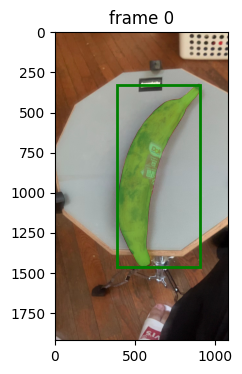

Label file created for frame 1 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00001.txt


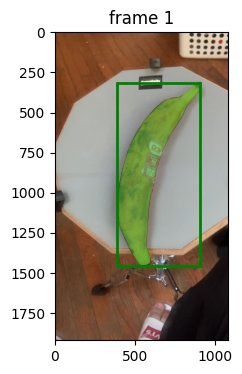

Label file created for frame 2 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00002.txt


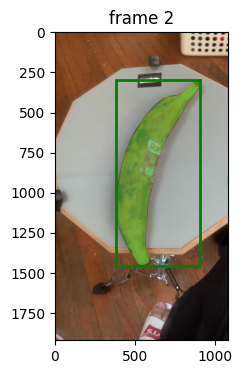

Label file created for frame 3 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00003.txt


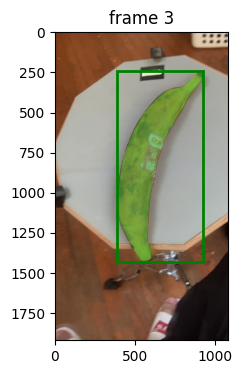

Label file created for frame 4 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00004.txt


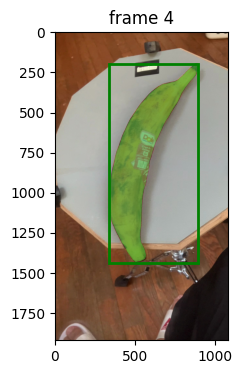

Label file created for frame 5 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00005.txt


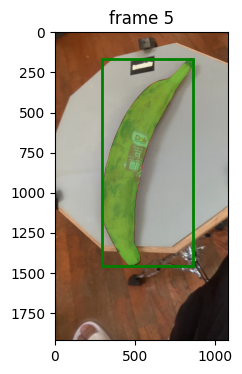

Label file created for frame 6 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00006.txt


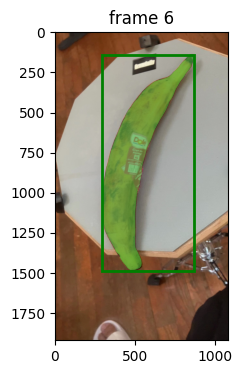

Label file created for frame 7 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00007.txt


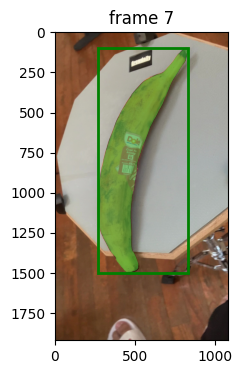

Label file created for frame 8 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00008.txt


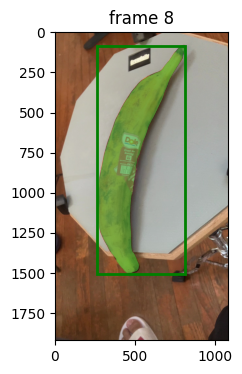

Label file created for frame 9 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00009.txt


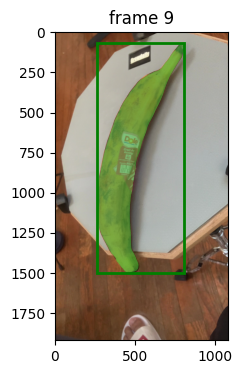

Label file created for frame 10 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00010.txt


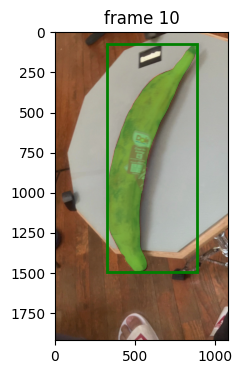

Label file created for frame 11 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00011.txt


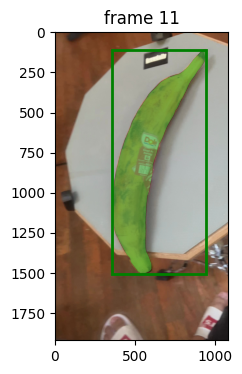

Label file created for frame 12 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00012.txt


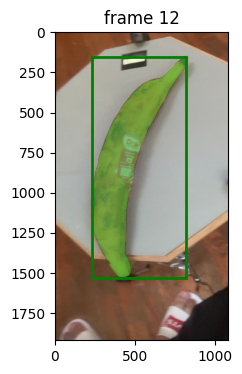

Label file created for frame 13 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00013.txt


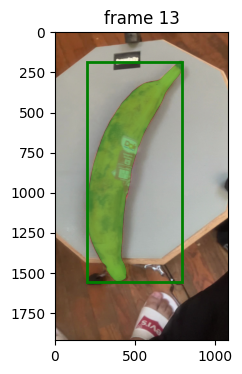

Label file created for frame 14 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00014.txt


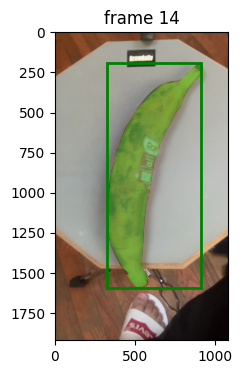

Label file created for frame 15 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00015.txt


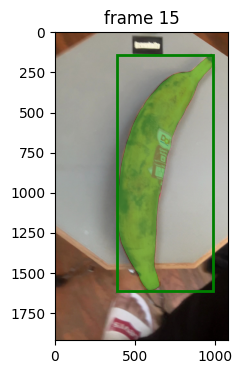

Label file created for frame 16 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00016.txt


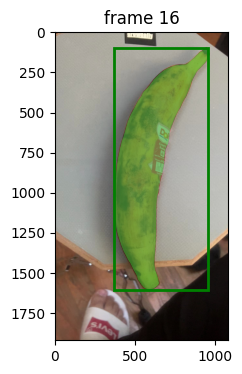

Label file created for frame 17 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00017.txt


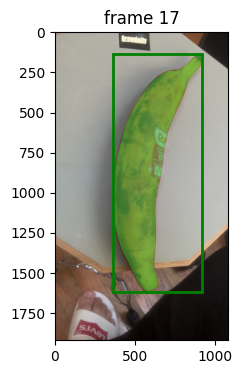

Label file created for frame 18 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00018.txt


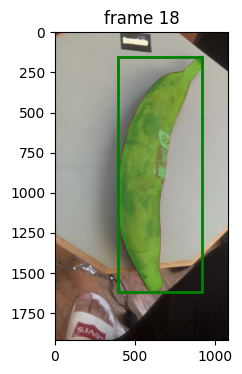

Label file created for frame 19 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00019.txt


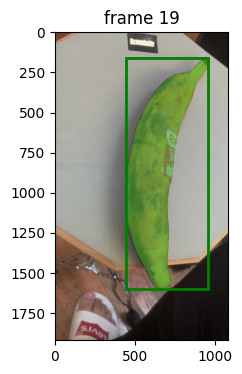

Label file created for frame 20 as /Users/jeanmarckceant/Desktop/dataset/Segment_folder_vids/0_labl_plaintain/00020.txt


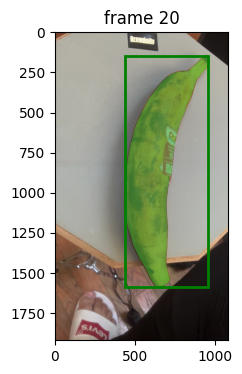

In [216]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def get_bounding_box_from_mask(mask):
    mask = np.squeeze(mask)
    coords = np.argwhere(mask)

    if coords.size == 0:
        return None

    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0)

    return [x0, y0, x1, y1]

def convert_to_yolo_format(image_width, image_height, box):
    x0, y0, x1, y1 = box
    center_x = (x0 + x1) / 2 / image_width
    center_y = (y0 + y1) / 2 / image_height
    width = (x1 - x0) / image_width
    height = (y1 - y0) / image_height
    return center_x, center_y, width, height

def save_labels_for_frame(frame_idx, frame_name, video_segments, label_directory, image_width, image_height):
    label_filename = os.path.join(label_directory, f"{os.path.splitext(frame_name)[0]}.txt")
    with open(label_filename, 'w') as label_file:
        for obj_id, mask in video_segments[frame_idx].items():
            box = get_bounding_box_from_mask(mask)
            if box is not None:
                center_x, center_y, width, height = convert_to_yolo_format(image_width, image_height, box)
                label_content = f"{obj_id} {center_x} {center_y} {width} {height}\n"
                label_file.write(label_content)
    print(f"Label file created for frame {frame_idx} as {label_filename}")

# Run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

# Combine with initial segmentation results
for frame_idx, mask_dict in segmentation_results.items():
    if frame_idx not in video_segments:
        video_segments[frame_idx] = {}
    for obj_id, mask in mask_dict.items():
        video_segments[frame_idx][obj_id] = mask  # Store the mask directly


# Process and save labels for all frames
for out_frame_idx in range(len(frame_names)):
    frame_path = os.path.join(selected_directory, frame_names[out_frame_idx])
    image = Image.open(frame_path)
    image_width, image_height = image.size

    # Save the labels for the current frame
    save_labels_for_frame(out_frame_idx, frame_names[out_frame_idx], video_segments, label_directory, image_width, image_height)
    
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(image)
    
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        if isinstance(out_mask, dict):
            for sub_obj_id, sub_mask in out_mask.items():
                show_mask(sub_mask, plt.gca(), obj_id=sub_obj_id)
                box = get_bounding_box_from_mask(sub_mask)
                if box is not None:
                    show_box(box, plt.gca())
        else:
            show_mask(out_mask, plt.gca(), obj_id=out_obj_id)
            box = get_bounding_box_from_mask(out_mask)
            if box is not None:
                show_box(box, plt.gca())

    plt.show()


In [ ]:

# Run this cell if working with a different dataset than chess_dataset
# Create directories for training and validation images and labels
dataset_base_path = '/content/datasets'
custom_dataset_path = 'custom'
train_dir_name = 'train2024'
val_dir_name = 'validation2024'

# Full paths for train and validation directories (images)
train_dir_path_images = os.path.join(dataset_base_path, custom_dataset_path, 'images', train_dir_name)
val_dir_path_images = os.path.join(dataset_base_path, custom_dataset_path, 'images', val_dir_name)

# Full paths for train and validation directories (labels)
train_dir_path_labels = os.path.join(dataset_base_path, custom_dataset_path, 'labels', train_dir_name)
val_dir_path_labels = os.path.join(dataset_base_path, custom_dataset_path, 'labels', val_dir_name)

# Create the directories if they don't exist
os.makedirs(train_dir_path_images, exist_ok=True)
os.makedirs(val_dir_path_images, exist_ok=True)
os.makedirs(train_dir_path_labels, exist_ok=True)
os.makedirs(val_dir_path_labels, exist_ok=True)


## 4. Configuring the Dataset

In [ ]:

# Run this cell if working with a different dataset than chess_dataset
# Copy coco.yaml and rename it to custom.yaml
source_yaml = '/content/ultralytics/ultralytics/cfg/datasets/coco.yaml'
destination_yaml = '/content/ultralytics/ultralytics/cfg/datasets/custom.yaml'
shutil.copy(source_yaml, destination_yaml)
print(f'File copied to: {destination_yaml}')


## 5. Train YOLOv8 Model

In [ ]:

# Initialize a YOLOv8 model from scratch using the yaml file
model = YOLO('yolov8n.yaml')

### Training the YOLOv8 Model with a Custom Dataset

In this section, we load a pre-trained YOLOv8 model (`yolov8n.pt`). Pre-trained models are recommended because they have already learned to recognize general features from a large dataset (e.g., COCO), which helps speed up and improve training on your custom dataset.

We then train the model using a custom dataset configuration, specified in the `data.yaml` file. This file defines the paths to your training, validation, and test datasets, as well as the number of classes and their names.

**Important Notes:**
- If you choose to use a different configuration file, such as `/content/ultralytics/ultralytics/cfg/datasets/custom.yaml`, make sure to update it with the correct paths to your datasets and label files.
- My recommendation is to start with a dataset like `chess_dataset`, which is already structured properly. You can replace the images and labels in that dataset with your own and then update the `data.yaml` file to reflect the new classes (objects) you want the model to detect.

This ensures that the model is trained correctly on your custom data.


In [ ]:

# Load a pretrained YOLO model (recommended)
model = YOLO('yolov8n.pt')

# Train the model using the custom dataset configuration
results = model.train(data='/content/chess_dataset/data.yaml', epochs=40)


### TensorBoard for Visualizing YOLOv8 Training Progress

TensorBoard is a powerful tool for visualizing the training process of your machine learning models. When you train a YOLOv8 model, it logs various metrics and statistics that help you understand how well your model is performing. These logs are saved in a folder (`/content/ultralytics/runs/detect/train`), and you can view them using TensorBoard.

By loading the TensorBoard extension and pointing it to the log directory, you can visualize metrics such as:

- **Loss:** This metric shows how well the model is learning. The lower the loss, the better the model's predictions align with the actual labels.
- **Precision:** This metric indicates how many of the model's positive predictions are actually correct. It measures the accuracy of positive predictions.
- **Recall:** This metric shows how many actual positives the model correctly identifies. It measures the model's ability to find all relevant instances in a dataset.
- **mAP (mean Average Precision):** This combines precision and recall to give a balanced measure of the model's performance. It's a key metric in object detection tasks.
- **F1 Score:** The harmonic mean of precision and recall, providing a single score that balances both concerns.

YOLOv8 logs these metrics along with other relevant statistics, such as:

- **Training and Validation Loss:** Visualizes the difference between the model’s performance on training data versus validation data, helping you spot overfitting.
- **Learning Rate:** Shows the progression of the learning rate during training, which can help you fine-tune the model's optimization process.

By visualizing these metrics, you can gain insights into how well your model is learning and where improvements might be needed.

In [ ]:

# Load TensorBoard extension
%load_ext tensorboard
%tensorboard --logdir /content/ultralytics/runs/detect/train


### Visualizing Training Metrics

After training, YOLOv8 generates various plots and images that help you evaluate the model's performance. These include precision-recall curves, confusion matrices, and loss plots. You can view these directly in the Colab notebook to understand how your model performed during training.

**Here’s how to display these images:**

In [ ]:
import glob
from IPython.display import Image, display

# Path to the directory where YOLOv8 saves training result images
train_results_images = glob.glob('/content/ultralytics/runs/detect/train/*.png')

# Display all training result images (e.g., precision-recall curves, confusion matrices)
for image_path in train_results_images:
    display(Image(filename=image_path, height=600))

## 6. Test Model

### Loading the Best Model and Running Inference on Test Images

After training, YOLOv8 automatically saves the best-performing model as `best.pt`. The `.pt` file format is specific to PyTorch, which is the deep learning framework used by YOLOv8. It contains the model’s architecture and weights (parameters) that were learned during training.

The `best.pt` file is named this way because YOLOv8 tracks the model's performance during training and saves the version of the model that achieved the highest performance on the validation dataset. This ensures that you are using the most accurate model for inference.

In the following code, we load the `best.pt` model and use it to run inference on the test images. The `source` parameter specifies the directory containing the test images, and `conf` sets the confidence threshold for predictions. By setting `save=True`, the results will be saved to a designated directory for you to review later.


In [ ]:

# Load the best model and run inference on test images
model = YOLO("/content/ultralytics/runs/detect/train/weights/best.pt")
results = model.predict(source="/content/chess_dataset/test/images", save=True, conf=0.5)


In [ ]:
import glob
from IPython.display import Image, display

# Path to the directory where YOLOv8 saves prediction images
predicted_images = glob.glob('/content/ultralytics/runs/detect/predict/*.jpg')

# Display all the predicted images
for image_path in predicted_images:
    display(Image(filename=image_path, height=600))



## Conclusion

In this tutorial, we demonstrated how to train a YOLOv8 model on a custom dataset using Google Colab. We covered setting up the environment, preparing the dataset, training the model, and evaluating the results.

### Next Steps:
- Experiment with different hyperparameters.
- Try fine-tuning the model for better performance.
- Explore deploying the trained model in a production environment.

Feel free to modify and experiment with this notebook further!


### Improving YOLOv8 Model Performance

To further enhance the performance of your YOLOv8 model, you can apply several techniques:

1. **Increase the Number of Epochs:**
   - Training for more epochs allows the model to continue learning from the data. However, be cautious of overfitting, where the model performs well on training data but poorly on unseen data.

2. **Increase the Number of Images:**
   - Adding more images to your dataset helps the model generalize better. The more diverse the images, the better the model will perform on new, unseen data.

3. **Increase Image Diversity:**
   - A diverse dataset ensures that the model can handle various scenarios. Include images taken from different angles, lighting conditions, and backgrounds.

4. **Apply Data Augmentation:**
   - Data augmentation is a technique used to artificially expand your dataset by creating modified versions of images. Common augmentations include rotations, flips, scaling, and color adjustments. YOLOv8 provides built-in options for data augmentation.

5. **Tune Hyperparameters:**
   - Experiment with different hyperparameters like learning rate, batch size, and confidence threshold. Fine-tuning these parameters can significantly impact model performance.

6. **Transfer Learning:**
   - You can start with a pre-trained model (e.g., trained on COCO) and fine-tune it on your dataset. This approach helps when you have limited data but still want to achieve good performance.

Here’s how you can implement some of these techniques:


### 1. Increasing the Number of Epochs

Increasing the number of epochs allows the model to learn for a longer period. Here's how you can train the model for more epochs:


In [ ]:
# Train the model with more epochs (e.g., 100)
results = model.train(data='/content/chess_dataset/data.yaml', epochs=100)

### 2. Adding More Images and Increasing Diversity

Adding more diverse images can be done by collecting additional data. Simply place the new images in the training folder and update your labels accordingly.


### 3. Data Augmentation in YOLOv8

YOLOv8 supports built-in data augmentation. You can enable it by specifying augmentation parameters in your training command. Here's how:


In [ ]:
# Apply data augmentation during training
results = model.train(data='/content/chess_dataset/data.yaml', epochs=40, augment=True)


### 4. Tuning Hyperparameters

You can tune hyperparameters such as learning rate, batch size, and more by adding them to the training command:

In [ ]:
# Example: Adjust learning rate and batch size
results = model.train(data='/content/chess_dataset/data.yaml', epochs=40, lr0=0.01, batch=16)

### Tuning Hyperparameters and Using Augmentation in YOLOv8

YOLOv8 offers a variety of hyperparameters that you can tune to optimize the model’s performance. These parameters control aspects of training like learning rate, batch size, and data augmentation techniques. Below is an overview of key hyperparameters and how you can adjust them for better results.

#### 1. Common Hyperparameters
Here are some important hyperparameters you can tune in YOLOv8:

- **`lr0`**: Initial learning rate (default: 0.01). This is the most crucial hyperparameter for controlling how quickly the model learns.
- **`momentum`**: Momentum for the SGD optimizer (default: 0.937). Momentum helps accelerate the model's convergence by taking into account past gradients.
- **`weight_decay`**: Regularization term to prevent overfitting (default: 0.0005).
- **`warmup_epochs`**: Number of epochs for learning rate warmup (default: 3.0). Warmup helps stabilize the training process by gradually increasing the learning rate.
- **`batch`**: Batch size for training (default: 16). Adjust this depending on your GPU memory capacity.
- **`epochs`**: Number of training epochs (default: 100). Increase the number of epochs for more thorough training, but be cautious of overfitting.
  
You can find more hyperparameters and settings in the [Ultralytics YOLOv8 documentation](https://docs.ultralytics.com/modes/train/).

#### 2. Data Augmentation Settings
YOLOv8 includes several built-in augmentation techniques to artificially expand your dataset and improve generalization:

- **`mosaic`**: A powerful augmentation technique that combines four images into one, enabling the model to learn from varied image contexts. This is enabled by default.
- **`mixup`**: An augmentation that blends two images together. It can improve robustness but might not always be beneficial for all datasets (default: 0.0).
- **`hsv_h`**: Adjusts the hue of the image (default: 0.015). A small adjustment helps the model generalize to different lighting conditions.
- **`hsv_s`**: Saturation adjustment (default: 0.7). This parameter helps handle images with varying color intensities.
- **`hsv_v`**: Value adjustment, controlling brightness (default: 0.4).
- **`fliplr`**: Probability of flipping the image left-right (default: 0.5). Useful for scenarios where objects might appear in different orientations.
  
To apply data augmentation during training, you can enable or adjust these settings in your training command like this:

In [ ]:
# Apply data augmentation during training
results = model.train(data='data.yaml', epochs=40, mosaic=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, fliplr=0.5)

#### 3. Advanced Training Options

- **Resume Training**: If training is interrupted, you can resume it by using the `resume=True` argument. This picks up where training left off.

- **Early Stopping**: To prevent overfitting, you can enable early stopping by setting the `patience` parameter. For example, `patience=10` will stop training if there is no improvement in validation metrics for 10 consecutive epochs.

- **Mixed Precision Training**: Enable `amp=True` to use automatic mixed precision, which reduces memory usage and speeds up training without significantly affecting accuracy.

For more details on all available training options, refer to the [Ultralytics YOLOv8 documentation](https://docs.ultralytics.com/modes/train/).

By adjusting these hyperparameters and applying data augmentation, you can significantly enhance your model’s performance and adaptability.


In [ ]:
# Apply data augmentation during training
results = model.train(data='data.yaml', epochs=40, mosaic=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, fliplr=0.5)

### 5. Transfer Learning

Fine-tuning a pre-trained model can improve performance on your specific dataset. Here’s how:


In [ ]:
# Load a pretrained YOLO model (e.g., from COCO)
model = YOLO('yolov8n.pt')

# Fine-tune the model on your custom dataset
results = model.train(data='/content/chess_dataset/data.yaml', epochs=40)

### 6. Experimenting with Model Architectures

YOLOv8 offers different model architectures (e.g., `yolov8n`, `yolov8s`, `yolov8m`, etc.). You can experiment with different architectures to find the best balance between speed and accuracy for your use case. For more information on what models you have available for fine-tuning visit `https://github.com/ultralytics/ultralytics`


In [ ]:
# Load a different YOLOv8 architecture (e.g., YOLOv8s for small model)
model = YOLO('yolov8s.pt')
results = model.train(data='/content/chess_dataset/data.yaml', epochs=40)
